<a href="https://colab.research.google.com/github/loverico/python_lecture/blob/master/%5BPython%E8%AC%9B%E5%BA%A7%5D%E7%AC%AC4%E5%9B%9E%E6%AD%8C%E8%A9%9E%E3%82%B5%E3%82%A4%E3%83%88%E3%81%AE%E3%82%B9%E3%82%AF%E3%83%AC%E3%82%A4%E3%83%94%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#今回学ぶこと
- webページをスクレイピングし、歌詞情報を取得する
- 歌詞を形態素解析し、可視化してみる
- 取得した歌詞から、統計モデルなどを用いて、歌詞を生成する

Webスクレイピングとは


* Webサイトから情報を取得する技術
* APIを公開していないサイトの情報も取得できる
* HTMLを読み込んで、必要な情報を抜き出す必要がある

手順


1. HTTPリクエストを送り、HTMLのレスポンスを取得
2. HTMLの中身を見て、必要な情報がある場所を確認
3. HTMLから必要な情報を抽出





## アーティストのページから歌詞ページ一覧を取得

今回は、Uta-Net からあるアーティスト(米津玄師)の歌詞をすべて取得。

以下のページから情報を取得

* アーティストページ - 曲ページのURLをすべて取得
* 曲ページ(歌詞ページ) - 歌詞を取得

requests について

* PythonのコードからHTTPリクエストを送るためのライブラリ
* 使い方が簡単


https://requests-docs-ja.readthedocs.io/en/latest/

beatiful soup について

* HTMLやXMLからデータを抽出するためのライブラリ
* 様々な条件でHTML上のデータの位置を指定

機能が多いので、使用の際はリファレンスを読むことをおすすめします。
http://kondou.com/BS4/

In [0]:
# 必要なライブラリをインポート
import bs4
import requests
import time
from pprint import pprint

In [0]:
# アーティストページ(米津玄師)のアドレス
ARTIST_URL = 'https://www.uta-net.com/artist/11591/'

# 曲ページの先頭アドレス
BASE_URL = 'https://www.uta-net.com'

In [0]:
# ページを読み込むFunction
def load_page(url):
  response = requests.get(url)
  response.raise_for_status()
  return response.text

In [0]:
artist_page = load_page(ARTIST_URL)

In [5]:
artist_page

'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "//www.w3.org/TR/html4/loose.dtd">\r\n<html xmlns:og="http://ogp.me/ns#" xmlns:mixi="http://mixi-platform.com/ns#" lang="ja">\r\n<head>\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n\t<title>LiSAの歌詞一覧リスト - 歌ネット</title>\r\n\t<meta name="description" content="LiSAの歌詞一覧リストページです。歌詞検索サービス歌ネットに登録されている「LiSA」の歌詞の曲目一覧を掲載しています。I doubt it,ID,I&#039;m a Rock star,赤い罠(who loves it?),AxxxiS,アコガレ望遠鏡,アシアトコンパス,ADAMAS\u3000歌ネットは無料の歌詞検索サービスです。 ">\r\n\t<meta name="keywords" content="LiSA,歌詞,I doubt it,ID,I&#039;m a Rock star,赤い罠(who loves it?),AxxxiS,アコガレ望遠鏡,アシアトコンパス,ADAMAS">\r\n\t<meta name="viewport" content="width=1190, maximum-scale=1, user-scalable=1">\r\n\t<link rel="Bookmark" href="https://www.uta-net.com/" title="歌詞検索の歌ネット">\r\n\t<link rel="canonical" href="https://www.uta-net.com/artist/11591/">\r\n\t<link rel="alternate" media="only screen and (max-width: 640px)" href="https://sp.uta-net.com/artist/1159

In [0]:
# タグをすべて取得する関数
def get_tags(page, target_tag):
  soup = bs4.BeautifulSoup(str(page), 'html.parser')
  tags = soup.find_all(target_tag)
  return tags

In [7]:
# td タグをすべて取得
td_list = get_tags(artist_page, 'td')
td_list

[<td class="side td1"><a href="/song/150571/">I doubt it</a></td>,
 <td class="td2"><a href="https://www.uta-net.com/artist/11591/">LiSA</a></td>,
 <td class="td3"><a href="https://www.uta-net.com/lyricist/40876/">LiSA</a></td>,
 <td class="td4"><a href="https://www.uta-net.com/composer/31643/">岸田</a></td>,
 <td class="side td5">確かな耳鳴りゆがんだ世界に</td>,
 <td class="side td1"><a href="/song/198612/">ID</a></td>,
 <td class="td2"><a href="https://www.uta-net.com/artist/11591/">LiSA</a></td>,
 <td class="td3"><a href="https://www.uta-net.com/lyricist/10159/">LiSA・古屋真</a></td>,
 <td class="td4"><a href="https://www.uta-net.com/composer/39887/">高橋浩一郎</a></td>,
 <td class="side td5">全方向完全アウェイで</td>,
 <td class="side td1"><a href="/song/144541/">I'm a Rock star</a></td>,
 <td class="td2"><a href="https://www.uta-net.com/artist/11591/">LiSA</a></td>,
 <td class="td3"><a href="https://www.uta-net.com/lyricist/10159/">LiSA・古屋真</a></td>,
 <td class="td4"><a href="https://www.uta-net.com/composer/36752

In [8]:
# 最初のtdタグを取得
td_list[0]

<td class="side td1"><a href="/song/150571/">I doubt it</a></td>

In [9]:
# 最初のtdタグからaタグを取得
a_list = get_tags(td_list[0], 'a')
a_list

[<a href="/song/150571/">I doubt it</a>]

In [10]:
# href属性を見て、URLに'song'が含まれているかを確認
a_list[0].get('href')

'/song/150571/'

In [11]:
if 'song' in a_list[0].get('href'):
  print(BASE_URL + a_list[0].get('href'))

https://www.uta-net.com/song/150571/


In [0]:
# 歌詞ページのURLのリスト
track_urls = []

In [0]:
# すべての曲のURLを取得
# td タグのリストを1つずつ処理
for td in td_list:
  # a タグのリストを取得し、1つずつ処理
  for a in get_tags(td, 'a'):
    # aタグのhref属性を取得
    href = a.get('href')
    # URLに'song'が入っている場合
    if 'song' in href:
      # track_urls に完全なURLを追加
      track_urls.append(BASE_URL + href)

In [14]:
# URLのリスト
track_urls

['https://www.uta-net.com/song/150571/',
 'https://www.uta-net.com/song/198612/',
 'https://www.uta-net.com/song/144541/',
 'https://www.uta-net.com/song/260369/',
 'https://www.uta-net.com/song/213432/',
 'https://www.uta-net.com/song/181508/',
 'https://www.uta-net.com/song/163669/',
 'https://www.uta-net.com/song/257111/',
 'https://www.uta-net.com/song/240265/',
 'https://www.uta-net.com/song/163579/',
 'https://www.uta-net.com/song/181506/',
 'https://www.uta-net.com/song/126138/',
 'https://www.uta-net.com/song/278546/',
 'https://www.uta-net.com/song/133655/',
 'https://www.uta-net.com/song/248506/',
 'https://www.uta-net.com/song/186930/',
 'https://www.uta-net.com/song/154518/',
 'https://www.uta-net.com/song/115389/',
 'https://www.uta-net.com/song/126143/',
 'https://www.uta-net.com/song/115388/',
 'https://www.uta-net.com/song/260496/',
 'https://www.uta-net.com/song/170230/',
 'https://www.uta-net.com/song/181504/',
 'https://www.uta-net.com/song/194755/',
 'https://www.ut

## 歌詞ページから歌詞を取得

歌詞ページの例: https://www.uta-net.com/song/162135/

In [15]:
track_urls[0]

'https://www.uta-net.com/song/150571/'

In [0]:
lyric_page = load_page(track_urls[0])

In [17]:
lyric_page

'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "//www.w3.org/TR/html4/loose.dtd">\r\n<html xmlns:og="http://ogp.me/ns#" xmlns:mixi="http://mixi-platform.com/ns#" lang="ja">\r\n<head>\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n\t<meta name="viewport" content="width=1024, maximum-scale=1, user-scalable=1">\r\n\t<title>LiSA I doubt it 歌詞 - 歌ネット</title>\r\n\t<meta property="og:title" content="「I doubt it/LiSA」の歌詞 って「イイネ！」" />\r\n\t<meta property="og:description" content="「確かな耳鳴り\u3000ゆがんだ世界に彷徨う 笑願…」勇気をもらったり、泣けたり、癒されたり…、この歌詞をチェックしてみて！人の心を打つ「言葉」がぎっしり！" />\r\n\t<meta property="og:image" content="https://www.uta-net.com/reverse/mixi_check/uta_net_logo_m.gif">\r\n\t<meta property="mixi:device-smartphone" content="https://sp.uta-net.com/song/150571/">\r\n\t<meta name="mixi-check-robots" CONTENT="notitle, nodescription">\r\n\t<meta name="description" content="LiSAの「I doubt it」歌詞ページです。作詞:LiSA,作曲:岸田。(歌いだし)確かな耳鳴りゆがんだ世界に 歌ネットは無料の歌詞検索サービスです。">\r\n\t<me

In [0]:
soup = bs4.BeautifulSoup(lyric_page, 'html.parser')

In [19]:
# id が kashi_area のタグを探す
soup.find(id='kashi_area')

<div id="kashi_area" itemprop="text">確かな耳鳴り　ゆがんだ世界に彷徨う<br>笑願に隠れた　ニセモノの純粋と　滲む模範解答<br><br/>もうsay doubt!　目に映る裏側も　見失ってドロップアウト<br/><br/>平然じゃいらんない　狂った心臓音<br/>もっと　剥きだした感情の　声を聴いて<br/>判定は決まんない　手探りでいい<br/>いつか　本当の答えを　蜃気楼の先に<br/><br/>慎重につぎはぎ　交わした言葉に　戸惑う<br/>見つけた隙間に　期待がこぼれてく<br/>信じていたいのに<br/><br/>もうnonsense!　運命のカードなんて　頼ったりしないわ<br/><br/>平然じゃいらんない　湿った心臓音<br/>そっと取り出して　感情の理由を知って<br/>判定は決まんない　繋がる　endless sorrow<br/>本当の答えを　自問自答の先に<br/><br/>譲っちゃいけない　このナミダが頬伝う感覚<br/><br/>平然じゃいらんない　狂った心臓音<br/>もっと　剥きだした感情の　声を聴いて<br/>判定は決まんない　手探りでいい<br/>いつか本当の答えを　蜃気楼の先に</br></br></div>

In [20]:
# テキストのみを抽出
soup.find(id='kashi_area').text

'確かな耳鳴り\u3000ゆがんだ世界に彷徨う笑願に隠れた\u3000ニセモノの純粋と\u3000滲む模範解答もうsay doubt!\u3000目に映る裏側も\u3000見失ってドロップアウト平然じゃいらんない\u3000狂った心臓音もっと\u3000剥きだした感情の\u3000声を聴いて判定は決まんない\u3000手探りでいいいつか\u3000本当の答えを\u3000蜃気楼の先に慎重につぎはぎ\u3000交わした言葉に\u3000戸惑う見つけた隙間に\u3000期待がこぼれてく信じていたいのにもうnonsense!\u3000運命のカードなんて\u3000頼ったりしないわ平然じゃいらんない\u3000湿った心臓音そっと取り出して\u3000感情の理由を知って判定は決まんない\u3000繋がる\u3000endless sorrow本当の答えを\u3000自問自答の先に譲っちゃいけない\u3000このナミダが頬伝う感覚平然じゃいらんない\u3000狂った心臓音もっと\u3000剥きだした感情の\u3000声を聴いて判定は決まんない\u3000手探りでいいいつか本当の答えを\u3000蜃気楼の先に'

In [21]:
# 全角スペースが文字化けしているので、半角スペースに置換
soup.find(id='kashi_area').text.replace('\u3000', ' ')

'確かな耳鳴り ゆがんだ世界に彷徨う笑願に隠れた ニセモノの純粋と 滲む模範解答もうsay doubt! 目に映る裏側も 見失ってドロップアウト平然じゃいらんない 狂った心臓音もっと 剥きだした感情の 声を聴いて判定は決まんない 手探りでいいいつか 本当の答えを 蜃気楼の先に慎重につぎはぎ 交わした言葉に 戸惑う見つけた隙間に 期待がこぼれてく信じていたいのにもうnonsense! 運命のカードなんて 頼ったりしないわ平然じゃいらんない 湿った心臓音そっと取り出して 感情の理由を知って判定は決まんない 繋がる endless sorrow本当の答えを 自問自答の先に譲っちゃいけない このナミダが頬伝う感覚平然じゃいらんない 狂った心臓音もっと 剥きだした感情の 声を聴いて判定は決まんない 手探りでいいいつか本当の答えを 蜃気楼の先に'

In [22]:
soup.find(id='kashi_area').text.split('　')

['確かな耳鳴り',
 'ゆがんだ世界に彷徨う笑願に隠れた',
 'ニセモノの純粋と',
 '滲む模範解答もうsay doubt!',
 '目に映る裏側も',
 '見失ってドロップアウト平然じゃいらんない',
 '狂った心臓音もっと',
 '剥きだした感情の',
 '声を聴いて判定は決まんない',
 '手探りでいいいつか',
 '本当の答えを',
 '蜃気楼の先に慎重につぎはぎ',
 '交わした言葉に',
 '戸惑う見つけた隙間に',
 '期待がこぼれてく信じていたいのにもうnonsense!',
 '運命のカードなんて',
 '頼ったりしないわ平然じゃいらんない',
 '湿った心臓音そっと取り出して',
 '感情の理由を知って判定は決まんない',
 '繋がる',
 'endless sorrow本当の答えを',
 '自問自答の先に譲っちゃいけない',
 'このナミダが頬伝う感覚平然じゃいらんない',
 '狂った心臓音もっと',
 '剥きだした感情の',
 '声を聴いて判定は決まんない',
 '手探りでいいいつか本当の答えを',
 '蜃気楼の先に']

In [23]:
for sentence in soup.find(id='kashi_area').text.split('　'):
  print(sentence)

確かな耳鳴り
ゆがんだ世界に彷徨う笑願に隠れた
ニセモノの純粋と
滲む模範解答もうsay doubt!
目に映る裏側も
見失ってドロップアウト平然じゃいらんない
狂った心臓音もっと
剥きだした感情の
声を聴いて判定は決まんない
手探りでいいいつか
本当の答えを
蜃気楼の先に慎重につぎはぎ
交わした言葉に
戸惑う見つけた隙間に
期待がこぼれてく信じていたいのにもうnonsense!
運命のカードなんて
頼ったりしないわ平然じゃいらんない
湿った心臓音そっと取り出して
感情の理由を知って判定は決まんない
繋がる
endless sorrow本当の答えを
自問自答の先に譲っちゃいけない
このナミダが頬伝う感覚平然じゃいらんない
狂った心臓音もっと
剥きだした感情の
声を聴いて判定は決まんない
手探りでいいいつか本当の答えを
蜃気楼の先に


In [0]:
# 歌詞を入れるリスト
lyrics = []

In [0]:
# 10曲分の歌詞をlyricsに入れる
for track_url in track_urls[:10]:
  lyric_page = load_page(track_url)
  soup = bs4.BeautifulSoup(lyric_page, 'html.parser')
  lyrics.append(soup.find(id='kashi_area').text.replace('　', ' '))
  time.sleep(1)

In [26]:
lyrics

['確かな耳鳴り ゆがんだ世界に彷徨う笑願に隠れた ニセモノの純粋と 滲む模範解答もうsay doubt! 目に映る裏側も 見失ってドロップアウト平然じゃいらんない 狂った心臓音もっと 剥きだした感情の 声を聴いて判定は決まんない 手探りでいいいつか 本当の答えを 蜃気楼の先に慎重につぎはぎ 交わした言葉に 戸惑う見つけた隙間に 期待がこぼれてく信じていたいのにもうnonsense! 運命のカードなんて 頼ったりしないわ平然じゃいらんない 湿った心臓音そっと取り出して 感情の理由を知って判定は決まんない 繋がる endless sorrow本当の答えを 自問自答の先に譲っちゃいけない このナミダが頬伝う感覚平然じゃいらんない 狂った心臓音もっと 剥きだした感情の 声を聴いて判定は決まんない 手探りでいいいつか本当の答えを 蜃気楼の先に',
 '全方向 完全アウェイで もう立ってるだけの現状から 始めるんだハタから見りゃ勝ち目はないって そう笑われても 導火線は走ってんだ誰かじゃ 最後まで 守れない僕の行方は だれにも預けない No mistake貫け 大胆 上空に掲げた 笑い飛ばすJOKER 暴れようか決めたら そうそう半端な覚悟じゃブレイク 特大のスピーカーで 理想鳴らして行け押しつぶしてくる世界に 舌を出せ大衆がレッテル貼りつけ もう笑ってるだけの あっち側に僕もいたしがみついても叶えたいってそう言えるスローガンを 持った今は解るんだ溜め込んだ 感情の音 守れない弱さ 今こそ チカラに変われ My mistake乾いた 雑踏 葛藤 構わず SHOUT！！メガホン飛ばすトリガー 本音を叫べ誰かが 採点ゴッコで騒いだって DIVEお待ちかねショータイム 声涸らすまで食いつぶされそうな プライド 奪い返せ今 いる場所が 例え 間違いでも未来なんかに この時を預けないGet ID貫け 大胆 上空に掲げた 笑い飛ばすJOKER 暴れようか決めたら そうそう半端な覚悟じゃ ブレイク特大のスピーカーで 理想鳴らして行け押しつぶしてくる世界に 舌を出せ',
 "ネオンの灯り染まった 街中ステレオだった退屈な日々が 動き出すアタシのストーリー真夜中 星に願った 未来に恋をしたんだだけどそれだけじゃ なんにも変わらない追いつきたくて 裸足になってやっと 見えた 素顔の My son

In [27]:
len(lyrics)

10

## MeCab を用いて形態素解析

MeCabのインストール

形態素解析とは

文章を意味をもつ最小単位の表現に分解すること。最小単位は単語になることが多い。

→分解した上でその最小単位の品詞などを推定する

In [28]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl libio-string

In [29]:
# 最新の辞書をダウンロード
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -a

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.
[install-mecab-ipadic-NEologd] : Start..
[install-mecab-ipadic-NEologd] : Check the existance of libraries
[install-mecab-ipadic-NEologd] :     find => ok
[install-mecab-ipadic-NEologd] :     sort => ok
[install-mecab-ipadic-NEologd] :     head => ok
[install-mecab-ipadic-NEologd] :     cut => ok
[install-mecab-ipadic-NEologd] :     egrep => ok
[install-mecab-ipadic-NEologd] :     mecab => ok
[install-mecab-ipadic-NEologd] :     mecab-config => ok
[install-mecab-ipadic-NEologd] :     make => ok
[install-mecab-ipadic-NEologd] :     curl => ok
[install-mecab-ipadic-NEologd] :     sed => ok
[install-mecab-ipadic-NEologd] :     cat => ok
[install-mecab-ipadic-NEologd] :     diff => ok
[install-mecab-ipadic-NEologd] :   

# MeCabで1曲ずつ形態素解析を行う

In [30]:
# MeCab セットアップ
import MeCab
import subprocess

cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                           shell=True).communicate()[0]).decode('utf-8')
mecab = MeCab.Tagger("-d {0}".format(path))
mecab.parse('')

'EOS\n'

## 分かち書きを行う
分かち書きとは単語と、単語の間に空白を入れて、語の区切りを明示化すること。英文などでは、単語の区切りを空白で入れているので文の最小単位がわかりやすいが、日本語ではそのような文化がなく、この処理を行なって単語を認識しやすくする。

In [0]:
# ラムダ式を使用。ラムダ式とは、defを使わずに関数を記述するときに使うテクニックである（ちなみに、このようにラムダ式を変数に代入することは、pep8というコード規約では非推奨とされている）
wakati_parser=lambda x: MeCab.Tagger("-Owakati").parse(x).split(" ")# 式内では x を引数として分かち書き処理を行なっている

In [32]:
wakati_parser('選挙の日ってうちじゃなぜか投票行って外食するんだ')

['選挙',
 'の',
 '日',
 'って',
 'うち',
 'じゃ',
 'なぜ',
 'か',
 '投票',
 '行っ',
 'て',
 '外食',
 'する',
 'ん',
 'だ',
 '\n']

In [34]:
mecab = MeCab.Tagger("-d {0}".format(path))
mecab.parse('')
for word in mecab.parse('選挙の日ってうちじゃなぜか投票行って外食するんだ').split('\n'):
  print(word)

選挙の日	名詞,固有名詞,一般,*,*,*,選挙の日,センキョノヒ,センキョノヒ
って	助詞,格助詞,連語,*,*,*,って,ッテ,ッテ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ
じゃ	助詞,副助詞,*,*,*,*,じゃ,ジャ,ジャ
なぜ	副詞,助詞類接続,*,*,*,*,なぜ,ナゼ,ナゼ
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
投票	名詞,サ変接続,*,*,*,*,投票,トウヒョウ,トーヒョー
行っ	動詞,自立,*,*,五段・カ行促音便,連用タ接続,行く,イッ,イッ
て	助詞,接続助詞,*,*,*,*,て,テ,テ
外食	名詞,サ変接続,*,*,*,*,外食,ガイショク,ガイショク
する	動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
ん	名詞,非自立,一般,*,*,*,ん,ン,ン
だ	助動詞,*,*,*,特殊・ダ,基本形,だ,ダ,ダ
EOS



In [35]:
mecab.parse('おのののか')

'おのののか\t名詞,固有名詞,人名,一般,*,*,おのののか,オノノノカ,オノノノカ\nEOS\n'

In [36]:
mecab.parse('おのなのか')

'おの\t名詞,一般,*,*,*,*,おの,オノ,オノ\nな\t助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ\nの\t名詞,非自立,一般,*,*,*,の,ノ,ノ\nか\t助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ\nEOS\n'

In [37]:
mecab.parse(lyrics[0])

'確か\t名詞,形容動詞語幹,*,*,*,*,確か,タシカ,タシカ\nな\t助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ\n耳鳴り\t名詞,一般,*,*,*,*,耳鳴り,ミミナリ,ミミナリ\nゆがん\t動詞,自立,*,*,五段・マ行,連用タ接続,ゆがむ,ユガン,ユガン\nだ\t助動詞,*,*,*,特殊・タ,基本形,だ,ダ,ダ\n世界\t名詞,一般,*,*,*,*,世界,セカイ,セカイ\nに\t助詞,格助詞,一般,*,*,*,に,ニ,ニ\n彷徨\t名詞,サ変接続,*,*,*,*,彷徨,ホウコウ,ホーコー\nう\t助動詞,*,*,*,不変化型,基本形,う,ウ,ウ\n笑\t名詞,固有名詞,人名,名,*,*,笑,エミ,エミ\n願\t名詞,接尾,一般,*,*,*,願,ネガイ,ネガイ\nに\t助詞,格助詞,一般,*,*,*,に,ニ,ニ\n隠れ\t動詞,自立,*,*,一段,連用形,隠れる,カクレ,カクレ\nた\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ\nニセモノ\t名詞,固有名詞,一般,*,*,*,ニセモノ,ニセモノ,ニセモノ\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\n純粋\t名詞,形容動詞語幹,*,*,*,*,純粋,ジュンスイ,ジュンスイ\nと\t助詞,格助詞,引用,*,*,*,と,ト,ト\n滲む\t動詞,自立,*,*,五段・マ行,基本形,滲む,ニジム,ニジム\n模範\t名詞,一般,*,*,*,*,模範,モハン,モハン\n解答\t名詞,サ変接続,*,*,*,*,解答,カイトウ,カイトー\nもう\t副詞,一般,*,*,*,*,もう,モウ,モー\nsay\t名詞,一般,*,*,*,*,*\ndoubt!\t名詞,固有名詞,一般,*,*,*,Doubt!,ダウト,ダウト\n目\t名詞,接尾,一般,*,*,*,目,メ,メ\nに\t助詞,格助詞,一般,*,*,*,に,ニ,ニ\n映る\t動詞,自立,*,*,五段・ラ行,基本形,映る,ウツル,ウツル\n裏側\t名詞,一般,*,*,*,*,裏側,ウラガワ,ウラガワ\nも\t助詞,係助詞,*,*,*,*,も,モ,モ\n見失っ\t動詞,自立,*,*,五段・ワ行促音便,連用タ接続,見失う,ミウシナッ,ミウシナッ\nて\t助詞,接続助詞,*,*,*,*,て,テ,テ\nドロップアウト\t名詞,固有名詞,一般,*,*,*,ドロップ

In [0]:
node = mecab.parseToNode(lyrics[0])

In [39]:
while node:
  #単語を取得
  word = node.surface
  #品詞を取得
  pos = node.feature.split(',')[0]
  if pos in ['名詞','形容詞','副詞','動詞']:
    print(word)
  #次の単語に進める
  node = node.next

確か
耳鳴り
ゆがん
世界
彷徨
笑
願
隠れ
ニセモノ
純粋
滲む
模範
解答
もう
say
doubt!
目
映る
裏側
見失っ
ドロップアウト
平然
いらん
ない
狂っ
心臓
音
もっと
剥き
だし
感情
声
聴い
判定
決まん
手探り
いい
いつか
本当
答え
蜃気楼
先
慎重
つぎはぎ
交わし
言葉
戸惑う
見つけ
隙間
期待
こぼれ
く
信じ
い
もう
nonsense
運命
カード
頼っ
し
平然
いらん
ない
湿っ
心臓
音
そっと
取り出し
感情
理由
知っ
判定
決まん
繋がる
endless
sorrow
本当
答え
自問自答
先
譲っ
いけ
ナミダ
頬
伝う
感覚
平然
いらん
ない
狂っ
心臓
音
もっと
剥き
だし
感情
声
聴い
判定
決まん
手探り
いい
いつか
本当
答え
蜃気楼
先


In [40]:
# すべての曲の単語を入れる配列
words = []

for lyric in lyrics:
  node = mecab.parseToNode(lyric)
  while node:
    #単語を取得
    word = node.surface
    #品詞を取得
    print(node.feature.split(','))
    pos = node.feature.split(',')[0]
    if pos in ['名詞','形容詞','副詞','動詞']:
      words.append(word)
    #次の単語に進める
    node = node.next

['BOS/EOS', '*', '*', '*', '*', '*', '*', '*', '*']
['名詞', '形容動詞語幹', '*', '*', '*', '*', '確か', 'タシカ', 'タシカ']
['助動詞', '*', '*', '*', '特殊・ダ', '体言接続', 'だ', 'ナ', 'ナ']
['名詞', '一般', '*', '*', '*', '*', '耳鳴り', 'ミミナリ', 'ミミナリ']
['動詞', '自立', '*', '*', '五段・マ行', '連用タ接続', 'ゆがむ', 'ユガン', 'ユガン']
['助動詞', '*', '*', '*', '特殊・タ', '基本形', 'だ', 'ダ', 'ダ']
['名詞', '一般', '*', '*', '*', '*', '世界', 'セカイ', 'セカイ']
['助詞', '格助詞', '一般', '*', '*', '*', 'に', 'ニ', 'ニ']
['名詞', 'サ変接続', '*', '*', '*', '*', '彷徨', 'ホウコウ', 'ホーコー']
['助動詞', '*', '*', '*', '不変化型', '基本形', 'う', 'ウ', 'ウ']
['名詞', '固有名詞', '人名', '名', '*', '*', '笑', 'エミ', 'エミ']
['名詞', '接尾', '一般', '*', '*', '*', '願', 'ネガイ', 'ネガイ']
['助詞', '格助詞', '一般', '*', '*', '*', 'に', 'ニ', 'ニ']
['動詞', '自立', '*', '*', '一段', '連用形', '隠れる', 'カクレ', 'カクレ']
['助動詞', '*', '*', '*', '特殊・タ', '基本形', 'た', 'タ', 'タ']
['名詞', '固有名詞', '一般', '*', '*', '*', 'ニセモノ', 'ニセモノ', 'ニセモノ']
['助詞', '連体化', '*', '*', '*', '*', 'の', 'ノ', 'ノ']
['名詞', '形容動詞語幹', '*', '*', '*', '*', '純粋', 'ジュンスイ', 'ジュンスイ']
['助詞', '格助詞', '引用

In [41]:
words

['確か',
 '耳鳴り',
 'ゆがん',
 '世界',
 '彷徨',
 '笑',
 '願',
 '隠れ',
 'ニセモノ',
 '純粋',
 '滲む',
 '模範',
 '解答',
 'もう',
 'say',
 'doubt!',
 '目',
 '映る',
 '裏側',
 '見失っ',
 'ドロップアウト',
 '平然',
 'いらん',
 'ない',
 '狂っ',
 '心臓',
 '音',
 'もっと',
 '剥き',
 'だし',
 '感情',
 '声',
 '聴い',
 '判定',
 '決まん',
 '手探り',
 'いい',
 'いつか',
 '本当',
 '答え',
 '蜃気楼',
 '先',
 '慎重',
 'つぎはぎ',
 '交わし',
 '言葉',
 '戸惑う',
 '見つけ',
 '隙間',
 '期待',
 'こぼれ',
 'く',
 '信じ',
 'い',
 'もう',
 'nonsense',
 '運命',
 'カード',
 '頼っ',
 'し',
 '平然',
 'いらん',
 'ない',
 '湿っ',
 '心臓',
 '音',
 'そっと',
 '取り出し',
 '感情',
 '理由',
 '知っ',
 '判定',
 '決まん',
 '繋がる',
 'endless',
 'sorrow',
 '本当',
 '答え',
 '自問自答',
 '先',
 '譲っ',
 'いけ',
 'ナミダ',
 '頬',
 '伝う',
 '感覚',
 '平然',
 'いらん',
 'ない',
 '狂っ',
 '心臓',
 '音',
 'もっと',
 '剥き',
 'だし',
 '感情',
 '声',
 '聴い',
 '判定',
 '決まん',
 '手探り',
 'いい',
 'いつか',
 '本当',
 '答え',
 '蜃気楼',
 '先',
 '方向',
 '完全',
 'アウェイ',
 'もう',
 '立っ',
 'てる',
 '現状',
 '始める',
 'ん',
 'ハタ',
 '見りゃ',
 '勝ち目',
 'ないっ',
 'そう',
 '笑わ',
 'れ',
 '導火線',
 '走っ',
 'ん',
 '誰か',
 '最後',
 '守れ',
 '僕の行方',
 'だれ',
 '預け',
 'No',
 'mistake',
 '貫け',
 

collections.Counter を使って単語の出現回数をカウント



In [0]:
import collections

word_counter = collections.Counter(words)

In [43]:
# 何種類の単語があるか
len(word_counter)

956

In [44]:
# 単語の出現回数
word_counter['あなた']

0

In [45]:
# 出現回数が多い順に並べる
word_counter.most_common()

[('ん', 19),
 ('し', 16),
 ('僕', 15),
 ('れ', 12),
 ('I', 11),
 ('世界', 10),
 ('いい', 10),
 ('アナタ', 10),
 ('今', 9),
 ('Just', 9),
 ('の', 9),
 ('ない', 8),
 ('さ', 8),
 ('よう', 8),
 ('you', 8),
 ('いつか', 7),
 ('なっ', 7),
 ('何', 7),
 ('感情', 6),
 ('それ', 6),
 ('信じる', 6),
 ('中', 6),
 ('今日', 6),
 ('ずっと', 6),
 ('見', 6),
 ('いく', 6),
 ('キミ', 6),
 ('明日', 6),
 ('MY', 6),
 ('もう', 5),
 ('心臓', 5),
 ('音', 5),
 ('声', 5),
 ('い', 5),
 ('てる', 5),
 ('そう', 5),
 ('心', 5),
 ('a', 5),
 ('m', 5),
 ('られ', 5),
 ('言わ', 5),
 ('みたい', 5),
 ('ちゃう', 5),
 ('It', 5),
 ('s', 5),
 ('願い', 5),
 ('僕ら', 5),
 ('こと', 5),
 ('だし', 4),
 ('答え', 4),
 ('先', 4),
 ('期待', 4),
 ('誰か', 4),
 ('未来', 4),
 ('星', 4),
 ('想い', 4),
 ('まま', 4),
 ('夢', 4),
 ('誰', 4),
 ('続け', 4),
 ('止め', 4),
 ('show', 4),
 ('好き', 4),
 ('2', 4),
 ('まだ', 4),
 ('the', 4),
 ('どうせ', 4),
 ('AxxxiS', 4),
 ('結晶', 4),
 ('願う', 4),
 ('TiME', 4),
 ('僕たち', 4),
 ('刻める', 4),
 ('平然', 3),
 ('いらん', 3),
 ('もっと', 3),
 ('判定', 3),
 ('決まん', 3),
 ('本当', 3),
 ('蜃気楼', 3),
 ('言葉', 3),
 ('く', 3),
 ('信じ',

## ワードクラウドで可視化する

ワードクラウド（word cloud）とは単語を出現回数に比例する大きさで雲のように並べたもの


例

![代替テキスト](https://oku.edu.mie-u.ac.jp/~okumura/python/img/wc1.png)


Python では wordcloud モジュールで作成

In [46]:
# 日本語フォントをインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (7,498 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 145237 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

In [0]:
import matplotlib.pyplot as plt
import wordcloud

In [0]:
# 日本語フォントのパス
fpath = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'

In [0]:
# wordcloud で使うために、単語のリストをスペース区切りの文字列に変換
words_str = ' '.join(words)

In [0]:
lyric_cloud = wordcloud.WordCloud(background_color="white", 
                                  font_path=fpath, 
                                  width=900, 
                                  height=500).generate(words_str)

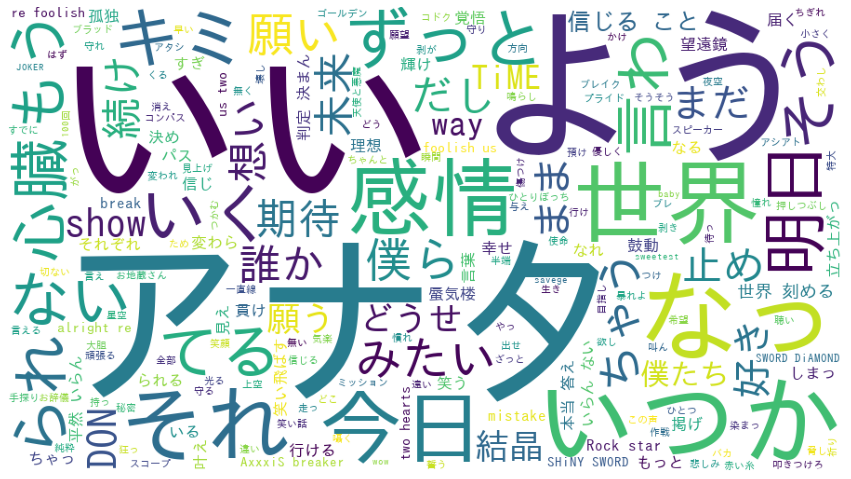

In [51]:
plt.figure(figsize=(15,12))
plt.imshow(lyric_cloud)
plt.axis("off")
plt.show()

意味を持たない単語が多くなってしまう

これを防ぐのが、stopwords。stopwordsで与えられた単語をword cloud から除外する

In [0]:
stop_words = [ 'てる', 'いる', 'なる', 'れる', 'する', 'ある', 'こと', 'これ', 'さん', 'して', \
             'くれる', 'やる', 'くださる', 'そう', 'せる', 'した',  '思う',  \
             'それ', 'ここ', 'ちゃん', 'くん', '', 'て','に','を','は','の', 'が', 'と', 'た', 'し', 'で', \
             'ない', 'も', 'な', 'い', 'か', 'ので', 'よう', '']

In [0]:
lyric_cloud = wordcloud.WordCloud(background_color="white", 
                                  font_path=fpath,
                                  width=900, 
                                  height=500,
                                  stopwords=stop_words).generate(words_str)

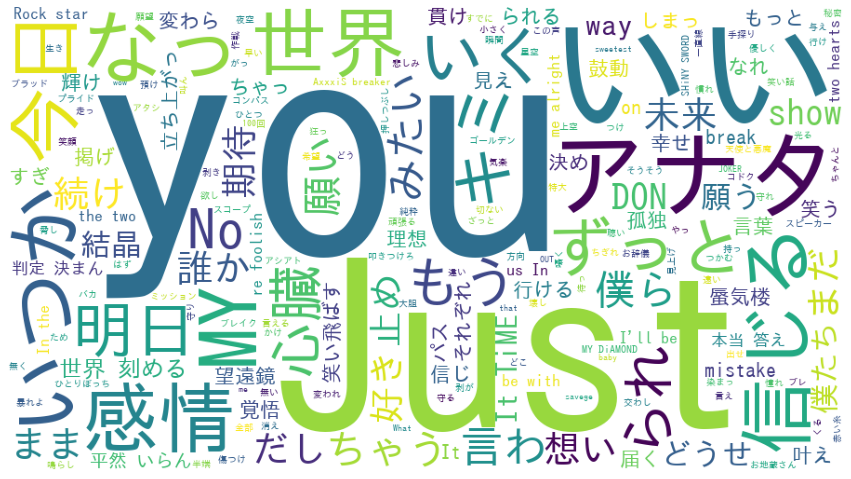

In [54]:
plt.figure(figsize=(15,12))
plt.imshow(lyric_cloud)
plt.axis("off")
plt.show()

# 歌詞を自動生成する。(秋元康編）


### 先ほどのスクレイピングメソッドをクラス化

In [0]:
# url
import urllib.parse
from tqdm import tqdm_notebook as tqdm
#人気順（昇順）
POPULAR_ASC = 4
# 人気順（降順)
POPULAR_DESC = 3
# 作詞者氏名で検索
SEARCH_TYPE_WRITER=3

class LyricFetcher():
    artist_name = None
    base_url = None
    lyrics_list =None
    stop_words = []
    # 初期化メソッド
    def __init__(self,artist_name,base_url=BASE_URL):
        self.lyrics_list= []
        self.artist_name = artist_name

    def build_list_url(self, keyword, search_type=SEARCH_TYPE_WRITER, sort_type=POPULAR_ASC, page_num=1):
        return f"https://www.uta-net.com/search/?Aselect={search_type}&Bselect=3&Keyword={urllib.parse.quote(keyword)}&sort={sort_type}&pnum={page_num}"
    
    def remove_stop_words(self,words=[], stop_words=[]):
        if len(stop_words)> 0:
            self.stop_wrods = stop_words
        return [word for word in words if word not in self.stop_words]
        
    def extract_track_urls(self, td_list, fetch_cnt):
        track_urls = []
        for td in td_list:
          # a タグのリストを取得し、1つずつ処理
          for a in self.get_tags(td, 'a'):
            # aタグのhref属性を取得
            href = a.get('href')
            # URLに'song'が入っている場合
            if 'song' in href:
              # track_urls に完全なURLを追加
              track_urls.append(BASE_URL + href)
        print(len(track_urls[:fetch_cnt]))
        return track_urls[:fetch_cnt]

    def get_tags(self, page, target_tag):
        soup = bs4.BeautifulSoup(str(page), 'html.parser')
        tags = soup.find_all(target_tag)
        return tags

    def load_page(self, url):
        response = requests.get(url)
        response.raise_for_status()
        return response.text

    def fetch_lyric(self, track_url):
        if track_url == "":
            return None
        lyric_page = self.load_page(track_url)
        soup = bs4.BeautifulSoup(lyric_page, "lxml")
        # アクセス過多を防ぐために１秒間休止
        time.sleep(1)
        for s in soup.find(id="kashi_area").findAll("br"):
            s.replace_with('¥n')
        return soup.find(id="kashi_area").text.replace('　', ' ')

    def run_fetch(self, fetch_cnt=10, sort_type=POPULAR_ASC):
        page_num= int(fetch_cnt / 200) if fetch_cnt % 200 == 0 else int(fetch_cnt / 200) +1
        for page in tqdm(range(1, page_num + 1)):
        # url 作成
            url= self.build_list_url(self.artist_name,SEARCH_TYPE_WRITER, sort_type, page)
            print(url)
            try:
            # アーティストページ取得
                artist_page= self.load_page(url)
            except Exception as e:
                print(e)
                break
            # td_list を作成
            
            td_list = self.get_tags(artist_page, 'td')
            # そこから曲のurlリストを抽出
            track_urls= self.extract_track_urls(td_list, fetch_cnt)

            for track_url in tqdm(track_urls):
                text=self.fetch_lyric(track_url)
                self.lyrics_list.append(text)

    # return self.lyrics_list

In [56]:
# 秋元康の歌詞を取得
akimoto_lyrics = LyricFetcher("秋元康")
akimoto_lyrics.run_fetch(fetch_cnt=100, sort_type=POPULAR_ASC)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


https://www.uta-net.com/search/?Aselect=3&Bselect=3&Keyword=%E7%A7%8B%E5%85%83%E5%BA%B7&sort=4&pnum=1
100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [62]:
print(akimoto_lyrics.lyrics_list[0])
print(f"曲数: {len(akimoto_lyrics.lyrics_list)}")

['人が溢れた交差点を¥nどこへ行く？(押し流され)¥n似たような服を着て¥n似たような表情で…¥n¥n群れの中に紛れるように¥n歩いてる(疑わずに)¥n誰かと違うことに¥n何をためらうのだろう¥n¥n先行く人が振り返り¥n列を乱すなと¥nルールを説くけど¥nその目は死んでいる¥n¥n君は君らしく生きて行く自由があるんだ¥n大人たちに支配されるな¥n初めから そうあきらめてしまったら¥n僕らは何のために生まれたのか？¥n夢を見ることは時には孤独にもなるよ¥n誰もいない道を進むんだ¥nこの世界は群れていても始まらない¥nYesでいいのか？¥nサイレントマジョリティー¥n¥nどこかの国の大統領が¥n言っていた(曲解して)¥n声を上げない者たちは¥n賛成していると…¥n¥n選べることが大事なんだ¥n人に任せるな¥n行動しなければ¥nNoと伝わらない¥n¥n君は君らしくやりたいことをやるだけさ¥nOne of themに成り下がるな¥nここにいる人の数だけ道はある¥n自分の夢の方に歩けばいい¥n見栄やプライドの鎖に繋がれたような¥nつまらない大人は置いて行け¥nさあ未来は君たちのためにある¥nNo！と言いなよ！¥nサイレントマジョリティー¥n¥n誰かの後¥nついて行けば¥n傷つかないけど¥nその群れが¥n総意だと¥nひとまとめにされる¥n¥n君は君らしく生きて行く自由があるんだ¥n大人たちに支配されるな¥n初めから そうあきらめてしまったら¥n僕らは何のために生まれたのか？¥n夢を見ることは時には孤独にもなるよ¥n誰もいない道を進むんだ¥nこの世界は群れていても始まらない¥nYesでいいのか？¥nサイレントマジョリティー', '僕はYesと言わない¥n首を縦に振らない¥nまわりの誰もが頷いたとしても¥n僕はYesと言わない¥n絶対 沈黙しない¥n最後の最後まで抵抗し続ける¥n¥n叫びを押し殺す(Oh！Oh！Oh！)¥n見えない壁ができてた(Oh！Oh！)¥nここで同調しなきゃ裏切り者か¥n仲間からも撃たれると思わなかった¥nOh！Oh！¥n¥n僕は嫌だ¥n¥n不協和音を¥n僕は恐れたりしない¥n嫌われたって¥n僕には僕の正義があるんだ¥n殴ればいいさ¥n一度妥協したら死んだも同然¥n支配したいなら¥n僕を倒してから行けよ！¥n¥n君はYesと言うのか¥n軍門に下るのか¥n理

改行含み（brタグを¥nとみなす)で１００曲取得した。※ 今回は一行を１フレーズとしている。


## 先ほどのパーサーで分かちがき


In [0]:

import re
# wakati_lyrics = []
lyrics =""
breaking_chars = [
        '(',
        ')',
        '[',
        ']',
        '"',
        "'",
    ]
removing_breaking =re.compile(r"[\(\)\[\]']")
for lyric in akimoto_lyrics.lyrics_list:
    lyric = lyric.replace("¥n¥n", "¥n")
    lyric = removing_breaking.sub(" ",lyric)
    lyrics = lyrics + MeCab.Tagger('-Owakati').parse(lyric)
   

##マルコフ連鎖で歌詞生成
### マルコフ連鎖とは？
時系列の中で、１つ先の状態は「現在の状態」のみよって確率的に決定するモデルのこと。

P(Xt+1∣Xt,Xt−1,…,X1)=P(Xt+1∣Xt)

**※１つ先の時刻t+1にある状態Xt＋1は、（過去から現在までの状態Xt,Xt−1,…,X1と沢山あれど）現在の状態Xtのみを参照するだけで決定できるということを指している**

（逆にいえば、現在の状態Xtから、２つ先の時刻の状態は分からない。先の見えないすごろくのようなものをイメージしてください）

### →これを歌詞といた文章の生成に応用すると、現在の単語から、その次にきそうな単語の候補から一つ選んで単語を生成し、またその単語から次にきそうな単語を選んで...と文末がくるまで連鎖することで文章を生成することができる。
実用されているサイト：https://markov.cordx.net/


In [66]:
#　マルコフ連鎖生成ライブラリ　（https://github.com/jsvine/markovify）
!pip install markovify

     |████████████████████████████████| 245kB 4.2MB/s 
  Created wheel for markovify: filename=markovify-0.8.0-cp36-none-any.whl size=10694 sha256=4079995109d52dbd8837f184893fc7e8634d699d977316213874b5037b33b01a
  Stored in directory: /root/.cache/pip/wheels/5d/a8/92/35e2df870ff15a65657679dca105d190ec3c854a9f75435e40
Successfully built markovify


## 考察ポイント
マルコフ連鎖の仕組みはかなりシンプルなので、

こちらを参考に　https://qiita.com/k-jimon/items/f02fae75e853a9c02127

自分で実装してもいいかもしれませんね。

In [0]:
import markovify
# モデルを作成

text_model =markovify.NewlineText(lyrics,  state_size=3) 

state_size は状態の範囲を表すパラメータ。

１つの単語を１つの状態にしてしまうと、現在の状態から次の状態を決めるとき、取り得る単語の候補が多すぎたりするのである程度の数の単語の塊を１つの状態とした方が良い

**例えば「した」の次にくる単語の候補はあまりにも多い（そもそも助動詞なのか名詞なのかも分からない）が、「理解した」という単語の塊で一つの状態としてみなすことで、ある程度候補は絞られる**

今回は３単語で１つの状態とみなす（3階マルコフ連鎖）

In [0]:
def make_sentences(text, start=None, max=300, min=1, tries=100):
    if start is (None or ''):   # If start is not specified
        for _ in range(tries):
            sentence = str(text.make_sentence()).replace(' ', '')
            if sentence and len(sentence) <= max and len(sentence) >= min:
                return sentence
    else:  # If start is specified
        for _ in range(tries):
            sentence = str(text.make_sentence_with_start(beginning=start)).replace(' ', '')
            if sentence and len(sentence) <= max and len(sentence) >= min:
                return sentence

In [74]:
for _ in range(10):
        sentence = make_sentences(text_model, start='', max=400, min=100)
        print(sentence)

春のそよ風が¥n目を閉じれば¥n悩まずに行けるけれど…¥nハモれウォウ…¥n誰にも言ってないだろう¥n手を繋いで帰ろうか¥nフライングゲット¥n何なんにも釣れないわ¥nきっと¥n夜の街をただひたすら歩くんだ¥nIameccentric変わり者でいい¥n話したい誰かがいるってしあわせだ
ふいだった¥nのんびりした展開は¥nどういう君と僕はラブラブで¥n夢にしがみつくんだ¥nこんな孤独でいるのが好き¥n光合成¥nどこかで¥nたとえビリでも焦ることないさ¥n愛しさの答えがある¥nあきらめること強要されたって好きなように生きてみよう¥nずっとずっと¥nみんなと一緒なら楽しそう
あなたのことが¥n弾けるように¥nガラスの瓶がある¥n慣れておこうぜ¥nマジスカロックンロール¥n上からマリコ¥nわがままな奴め!¥n愛の場所がわかるように立っている¥n描いて来た¥n心臓止まりかけて¥nここで同調しなきゃ裏切り者か¥nフライングゲット¥n予約待ってるような¥nつまらない大人は置いて行け¥nさあ、ストレートに¥n抱きしめればいい?¥nぬくもりの中で¥n心が騒ぐよ¥n闇を行く人の群に¥n交差点渡ってる途中横に並んで声を掛けて¥nどこかで期待してるわ¥n桜が咲く季節に¥n君は懐かしんでいてはいけない¥n散らかった部屋のあちこちに¥n誰も探してた¥nひとりよがり
長い夜は口を閉ざし¥n星たちは¥n誰かが走り出す¥n何も話さなくていいBeginner!¥n失敗してたビキニ¥n告白できることって¥n何も変わらないだろう¥nそうお互いのその青さ映し合っている¥nすべてのその悲しみ¥n消えて行くんだ¥n大人になる¥n言いたいこと言い合って解決しよう¥nそんな生き方も¥nずっと誰と競って¥nあきれたり疲れたり¥n喜んでくれたね¥nまるで海雪
ねえ夏の強い陽射しに¥n僕を煽るように¥n衝動に素直になれる¥nシーズン２まで一気に観終わって¥n投げてみろ！¥n飛んでみよう！¥n今はもどかしい¥nやっと気づいた本当の気持ち¥n君はYesと言わない¥n欺あざむきたいなら¥nもう一度君を抱きしめて¥n一気に興奮して¥n思うままに生きてみよう」生まれて初めて固く決心をしたから¥nブランコが好きで¥nキスの前で目が覚めてもこのままでいい
誰にも¥n歩ける訳じゃないけど¥n聴こえない¥n誰のために¥nやさしさを知り¥n

## Deep Learning(LSTM)で歌詞を生成してみる
LSTM(Long Short Term Memory)とは？

脳神経における長期記憶(Long Term Memory)と短期記憶（Short Term Memory)の部分を複合して再現したニューラルネットワークモデル

→先ほどの一般的なマルコフ連鎖と違い、こちらは過去のデータも使用するため、そのデータも記憶する必要がある。


In [0]:
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam
import numpy as np
import random
import sys
import io
 



##入力の前処理を行う

In [0]:
listed_lyrics = lyrics.replace("¥ n","").split()#一旦、改行を取り除いて、単語の区切りで分割したリストを生成
 # 順序を保持したまま重複排除を行った単語リスト
orderd_word_set =sorted(set(listed_lyrics), key=listed_lyrics.index)
 # そしてそれを　番号を value とした辞書にする(逆引きも作成)
word_dict = {x: i for i , x in enumerate(orderd_word_set)}
inv_word_dict = {i: x for i , x in enumerate(orderd_word_set)}


In [146]:
#１単語ごとにスライドさせた、5つの単語で１つの要素のリスト(sentences )を作成
maxlen = 5 #こちらは最大で記憶する単語の数を指している
step = 1
sentences = [] 
next_words = [] #sentencesの次にくる単語リスト
for i in range(0, len(listed_lyrics) - maxlen, step):
    sentences.append(listed_lyrics[i: i + maxlen])
    next_words.append(listed_lyrics[i + maxlen])
len(sentences)
 


29712

In [147]:
len(y[0])

3659

In [0]:
# 単語のone-hot化（sentence の要素を単語ではなく、word_dict　にある番号のところだけTrue,それ以外はFalseになっているリストに変換する）
x = np.zeros((len(sentences), maxlen, len(orderd_word_set)), dtype=np.bool)
y = np.zeros((len(sentences), len(orderd_word_set)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, word in enumerate(sentence):
        x[i, t, word_dict[word]] = 1
    y[i, word_dict[next_words[i]]] = 1

In [149]:
x[0] #0番目のセンテンス

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [150]:
len(x[0][0])

3659

In [151]:
len(listed_lyrics)

29717

モデル組み立て

In [0]:
#ニューラルネットワークモデル組み立て(今回は時間の都合上、シンプルにLSTM層を一つ付け加えるだけ)
model = Sequential()
model.add(LSTM(128, input_shape=(len(x[0]), len(x[0][0]))))# 入力層(input_shape)は、x の構造に合わせるように

model.add(Dense(len(x[0][0]), activation='softmax'))
#最適化
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

##考察ポイント
できる方は、もっと複雑なネットワークをデザインしてもいいかもしれない.


補助の関数

In [0]:
#下のcallback関数のための補助関数
#予測値の正規化（最大の予測値がふられた単語のインデックスを返す)
def sample(preds, temperature=1.0):

    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
 
 # epochの終わりに呼び出されるcallback関数
 #予測した歌詞を出力する
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print('----- Generating text after Epoch: %d' % epoch)
 
    start_index = random.randint(0, len(sentences) - maxlen - 1)
    for diversity in [0.2]: #収束性を表す。0.2のみを実行
        print('----- diversity:', diversity)
 
        generated = ''
        sentence = listed_lyrics[start_index: start_index + maxlen]
        # sentence はリストなので文字列へ変換して使用
        generated += "".join(sentence)
        print(sentence)
        print('----- Generating with seed: "' + "".join(sentence)+ '"')
        sys.stdout.write(generated)
 
        #とりあえず３０語を生成させる
        for i in range(30):
            x_pred = np.zeros((1, maxlen, len(orderd_word_set)))
            for t, word in enumerate(sentence):
                x_pred[0, t, word_dict[word]] = 1.
 
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = inv_word_dict[next_index]
 
            generated += next_char
            sentence = sentence[1:]
            # sentence はリストなので append で結合する
            sentence.append(next_char)  
 
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
 
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [155]:
#モデル実行
model.fit(x, y,
          batch_size=128,
          epochs=60,
          callbacks=[print_callback])
 

Epoch 1/60
29712/29712 [==============================] - 37s 1ms/step - loss: 5.9483
----- Generating text after Epoch: 0
----- diversity: 0.2
['で', '私', 'の', 'ため', 'に']
----- Generating with seed: "で私のために"
で私のためにのにをたてのののにのののにのにをててないのにのをははててのにの
Epoch 2/60
29712/29712 [==============================] - 37s 1ms/step - loss: 5.7876
----- Generating text after Epoch: 1
----- diversity: 0.2
['自分', 'に', '言い訳', 'する', 'ん']
----- Generating with seed: "自分に言い訳するん"
自分に言い訳するんだだがのににてててたののののにををててたののはににててももも
Epoch 3/60
29712/29712 [==============================] - 37s 1ms/step - loss: 5.6098
----- Generating text after Epoch: 2
----- diversity: 0.2
['て', 'あふれる', '想い', 'あなた', 'の']
----- Generating with seed: "てあふれる想いあなたの"
てあふれる想いあなたののに!にててもてもないははてもないをのがのはのにはのはののののの
Epoch 4/60
29712/29712 [==============================] - 37s 1ms/step - loss: 5.4282
----- Generating text after Epoch: 3
----- diversity: 0.2
['シャンプー', 'その', '長い', '髪', '君']
----- Generating with seed: "シャンプーその長い髪君"
シャンプーその長い髪君にはをてたにがない

In [0]:

 
 
# build the model: a single LSTM
print('Build model...')
model = Sequential()
model.add(Dense(len(chars), activation='softmax'))
 

model.compile(loss='categorical_crossentropy', optimizer=optimizer)
 
 
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
 
 
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)
 
    start_index = random.randint(0, len(text) - maxlen - 1)
    start_index = 0  # テキストの最初からスタート
    for diversity in [0.2]:  # diversity は 0.2のみ使用 
        print('----- diversity:', diversity)
 
        generated = ''
        sentence = text[start_index: start_index + maxlen]
        # sentence はリストなので文字列へ変換して使用
        generated += "".join(sentence)
        print(sentence)
        
        # sentence はリストなので文字列へ変換して使用
        print('----- Generating with seed: "' + "".join(sentence)+ '"')
        sys.stdout.write(generated)
 
 
        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.
 
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
 
            generated += next_char
            sentence = sentence[1:]
            # sentence はリストなので append で結合する
            sentence.append(next_char)  
 
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
 
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)
 
model.fit(x, y,
          batch_size=128,
          epochs=60,
          callbacks=[print_callback])
 


## BERTで歌詞をしてみる





In [0]:
!pip install tqdm
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [0]:
# Bertのコンポーネントの transformers をダウンロード
!pip install transformers
!git clone https://github.com/loverico/transformers.git
!mkdir output


## BERT とは
自然言語処理に特化した事前学習済み機械学習モデル。
人間の文章認識能力を超えたことが話題になった。
### 事前学習済みモデルとは
あらかじめ汎化性のあるタスクを学習しておいたモデルのこと。
例えば、BERT の場合は、欠損した文章を与えてその欠損した箇所にはどんな単語が入るか推測させるなどのタスクを行う
その学習されたモデルを用いて、個別のタスクで更に学習させることによって効果的な学習結果が期待できる(→転移学習と呼ぶ）



In [0]:
from sklearn.model_selection import train_test_split
train, valid,_,_= train_test_split(total, list(range(2000)),test_size =.15,random_state=0)

import gc
# del akimoto_lyrics, _
# gc.collect()

path_w = "./train.txt"
with open(path_w, mode='w') as f:
    
    for lyric in train:
        row= wakati_parser(lyric)
        f.write(" ".join(row))  
path_w = "./valid.txt"
with open(path_w, mode='w') as f:
    
    for lyric in valid:
        row= wakati_parser(lyric)
        f.write(" ".join(row)) 

In [0]:
akimoto_lyrics.lyrics_list[0]

In [0]:
from transformers import BertJapaneseTokenizer
tokenizer = BertJapaneseTokenizer.from_pretrained('bert-base-japanese-whole-word-masking')
track_tokens=[tokenizer.tokenize(lyrics) for lyrics in akimoto_lyrics.lyrics_list]

In [0]:
track_tokens[0][:10]

In [0]:
from transformers.optimization import AdamW, WarmupLinearSchedule

In [0]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from janome.tokenizer import Tokenizer  # 追加
import numpy as np
import random
import sys
import io
 
path = './data.txt'
with io.open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('corpus length:', len(text))
 
#chars = sorted(list(set(text)))
#print('total chars:', len(chars))
#char_indices = dict((c, i) for i, c in enumerate(chars))
#indices_char = dict((i, c) for i, c in enumerate(chars))
 
text =Tokenizer().tokenize(text, wakati=True)  # 分かち書きする
chars = text
count = 0
char_indices = {}  # 辞書初期化
indices_char = {}  # 逆引き辞書初期化
 
for word in chars:
    if not word in char_indices:  # 未登録なら
       char_indices[word] = count  # 登録する      
       count +=1
       print(count,word)  # 登録した単語を表示
# 逆引き辞書を辞書から作成する
indices_char = dict([(value, key) for (key, value) in char_indices.items()])
 
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 5
step = 1
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))